In [7]:
# GHOST - Advection Test (2D)

import sys  
import numpy as np
import modepy as mp
sys.path.insert(0, '../src')
from Mesh import Mesh2D
from Discretization import SpatialDiscretization
from Solver import Solver

# discretization degree
p = 4

# geometry mapping degree (isoparametric)
p_geo = p

# read in mesh in GMSH format
mesh = Mesh2D("test", "../mesh/square_mesh_x_5y_5.msh")

# set up periodic boundary conditions
left = np.array([1.0,0.0,0.0]) 
right = np.array([1.0,0.0,1.0])
bottom = np.array([0.0,1.0,0.0])
top = np.array([0.0,1.0,1.0])
mesh.add_bc_on_hyperplanes([left,right,bottom,top],[1,2,3,4])
mesh.make_periodic((1,2),[1]) # left-right periodic (bcs parallel to axis 1)
mesh.make_periodic((3,4),[0]) # top-bottom periodic (axis 0)

#curvilinear transformation used in Del Rey Fernandez et al. (2017)
mesh.map_mesh(f_map=Mesh2D.grid_transformation(warp_factor=0.2), p_geo=p_geo)

# volume and facet quadrature degrees
tau = 2*p
mu = 2*p+1

theta = np.pi/4
a = np.sqrt(2)

# solver parameters
params = {"project_title": "adv_test_2d_p4qi",
         "problem": "constant_advection",
         "initial_condition": "sine",
         "wavelength": np.ones(2),
         "wave_speed": a*np.array([np.sin(theta),np.cos(theta)]),
         "upwind_parameter": 1.0,
         "integration_type": "quadrature",
         "solution_degree": p,
         "volume_quadrature_degree": tau,
         "facet_quadrature_degree": mu,
         "solution_representation": "nodal",
         "form": "weak",
         "time_integrator": "rk44",
         "final_time": 10.0,
         "time_step_scale": 0.1}

# set up solver
solver = Solver(params,mesh)
#solver.discretization.plot(plot_geometry_nodes=True, filename="../plots/quadrature_p3.pdf")

In [8]:
solver.run(write_interval=0.1)

dt =  0.0013886960144424386
writing every  72  time steps, total  7201


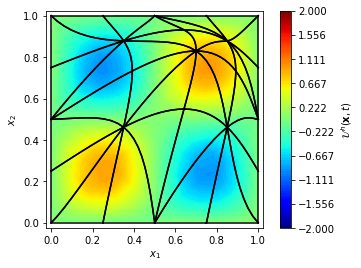

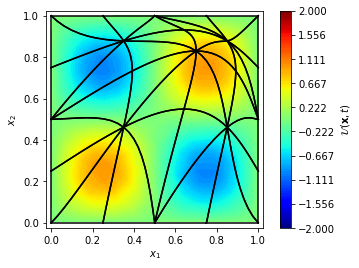

In [9]:
solver.post_process()
solver.plot(plot_numerical=True, plot_exact=True,
            plot_curves=True, plot_nodes=False, u_range=[-2,2])

In [10]:
solver.plot_time_steps(framerate=4, u_range=[-1.5,1.5])

ffmpeg -framerate 4 -i ../plots/adv_test_2d_p4qi/frame_%d.png ../plots/adv_test_2d_p4qi/video.mp4
